# Dataset fallo cardiaco

### Importamos las librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

### Cargamos los datos

In [2]:
# Leemos el dataset
data = pd.read_csv('heart_failure (1).csv')


In [3]:
# Mostramos las primeras filas:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
print('Número de entradas (rows): ',data.shape[0])
print('Número de features (columnas): ',data.shape[1])

Número de entradas (rows):  299
Número de features (columnas):  13


### Tratamos los nulos

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


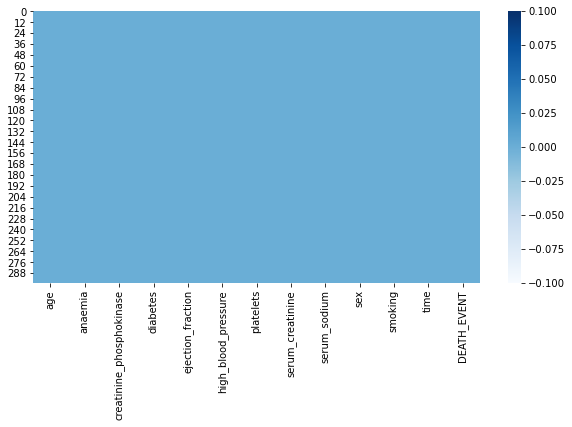

In [5]:
# Hay datos nulos?

# Podemos comprobarlo de varias formas:
# 1. Visualmente con un heatmap:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cmap='Blues', annot=False);
# 2. Sumando el número de NaN por columna
print(data.isnull().sum())


In [6]:
# Empleamos data.isnull().values.sum() en lugar de data.isnull().sum().sum() dado que es más eficiente
print('El número total de nulos es: ', data.isnull().values.sum())

El número total de nulos es:  0


### Visualización de los datos:

En este caso, el valor que queremos predecir (target) es `DEATH_EVENT`. Lo primero que queremos saebr es cómo de desbalanceado es nuestro dataset:

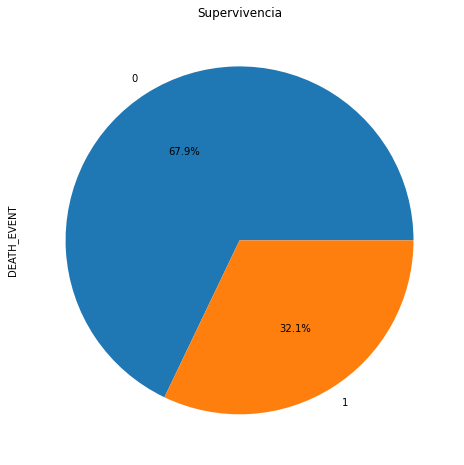

In [7]:
data.DEATH_EVENT.value_counts().plot.pie(autopct="%.1f%%");
plt.title('Supervivencia');

Podemos ver que **únicamente el 32.107% de los pacientes fallecieron**. A continuacón vamos a ver una descripción de los features:

In [8]:
# Vamos a ver una descripción de los datos:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Columnas booleanas

La mayoría de features son autoexplicativas. Comenzaremos analizando las columnas boolenas:
-`anaemia`, `diabetes`, `high_blood_pressure`, `sex` y `smoking`.

Una de las formas para ver la relación con la tasa de supervivencia con cada uno de los features booleanos es mediante un gráfico de barras **normalizado** (las personas distinguimos diferencias verticales con más facilidad de diferencia entre las áreas de un pie chart).

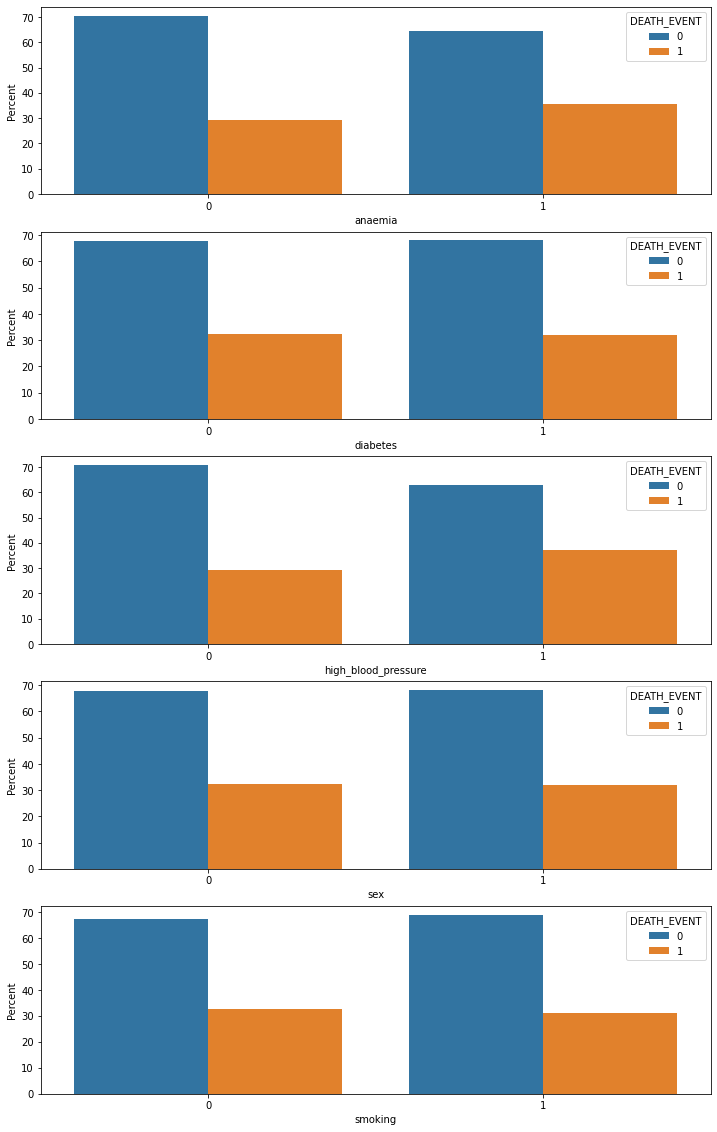

In [9]:
binarias = ['anaemia', 'diabetes', 'high_blood_pressure','sex','smoking']
num_bin = len(binarias)
plt.figure(figsize=[12,20])
for i,column in enumerate(binarias):
    plt.subplot(num_bin, 1, i+1)
    # Agrupamos por columna booleana y contamos los pacientes que sobrevien y los que no.
    # Si empleamos el atributo normalize = True y multiplicamos por 100 tenemos la frecuencia relativa 
    # y podremos comparar fácilmente
    prc = data.groupby(column)['DEATH_EVENT'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
    sns.barplot(data = prc, x = column, y = 'Percent', hue = 'DEATH_EVENT');


Podemos observar que:
- Las columnas `smoking`, `sex` y `diabetes` no aportan demasiada información. Tanto para el caso en el que la columna es 1 ó 0, el ratio de los pacientes que sobrevien y los que mueren es similar.
- Los pacientes que tienen anemia o una presión arterial alta tienen más posibilidades de fallecer.

#### Columnas int y float

A continuación analizaremos el resto de las columnas. En algunos casos tendremos que hacer una búsqueda de información para identificar posibles outliers.

Tras una breve búsqueda de información, sabemos que:
- 1. `creatinine_phosphokinase`: "Creatine phosphokinase (CPK or CK) is an enzyme in the body. The normal CPK values are between 20-120 $\mu$g/L. When the total CPK level is very high, it most often means there has been injury or stress to muscle tissue, the heart, or the brain". A continuación, veremos la distribución de los valores de CPK:

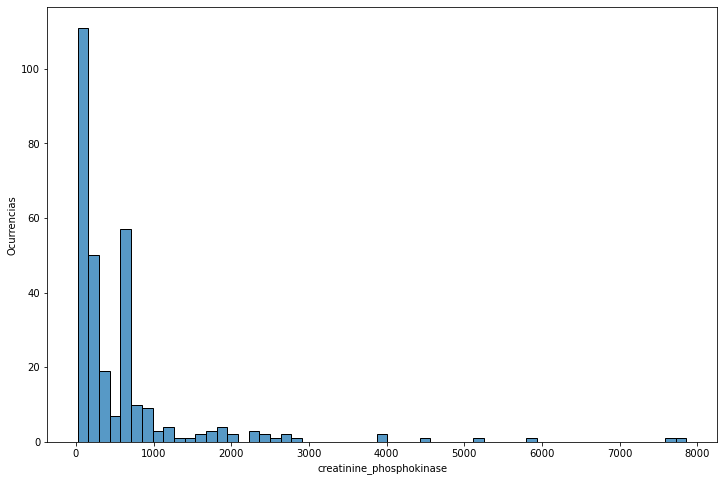

In [10]:

sns.histplot(x = data.creatinine_phosphokinase);
plt.ylabel('Ocurrencias');

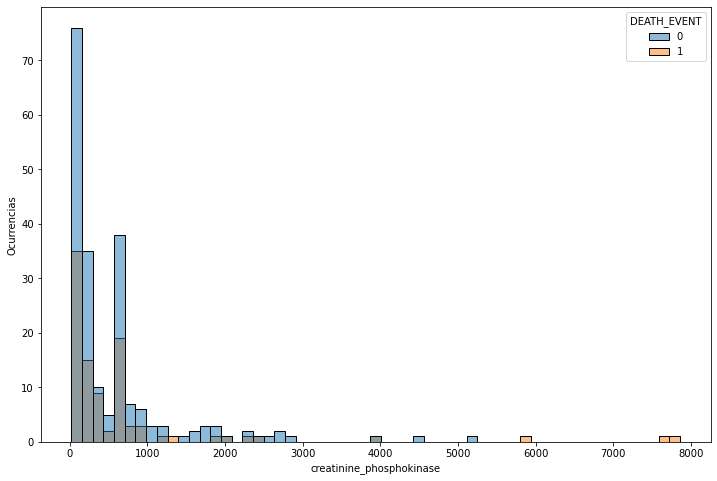

In [11]:

sns.histplot(x = data.creatinine_phosphokinase, hue = data.DEATH_EVENT);
plt.ylabel('Ocurrencias');


In [12]:
def relative_change(data, column):
    
    """
    Calcula la diferencia relativa entre las medias de dos distribuciones (hue = 'DEATH_EVENT')
    
    """
    av_fallecen = data[data.DEATH_EVENT == 1][column].mean()
    av_viven = data[data.DEATH_EVENT == 0][column].mean()
    
    print('El valor promedio de ',column,' para los pacientes que fallencen es de: ',av_fallecen)
    
    
    print('El valor promedio de ',column,' para los pacientes que sobreviven es de: ',av_viven)

    
    relative_diff = np.abs(av_fallecen - av_viven)/(av_fallecen + av_viven)*2*100
    print('Diferencia relativa: ',relative_diff,'%')
    
    

In [13]:
relative_change(data, 'creatinine_phosphokinase')

El valor promedio de  creatinine_phosphokinase  para los pacientes que fallencen es de:  670.1979166666666
El valor promedio de  creatinine_phosphokinase  para los pacientes que sobreviven es de:  540.0541871921182
Diferencia relativa:  21.506879279052082 %


Podemos ver que:
- Aproximadamente, la mitad de los pacientes tiene unos niveles "normales" (<200 mcg/L). 
- Los pacientes que tenía un CPK muy alto fallecieron.
- En la literatura médica se han observado valores de CPK de esa magnitud. A priori no aventuraría a decir que se traten de errores tipográficos.
- Aunque hay diferencia entre las medias de las distribuciones, las distribuciones en sí parecen bastante similares. Es posible que la diferencia entre las medias se deba a los valores CPK tan altos en algunos de los pacientes que fallecen y que este feature no aporte demasiada información.

Empleando violin plots también podemos ver la diferencia de las distribuciones:

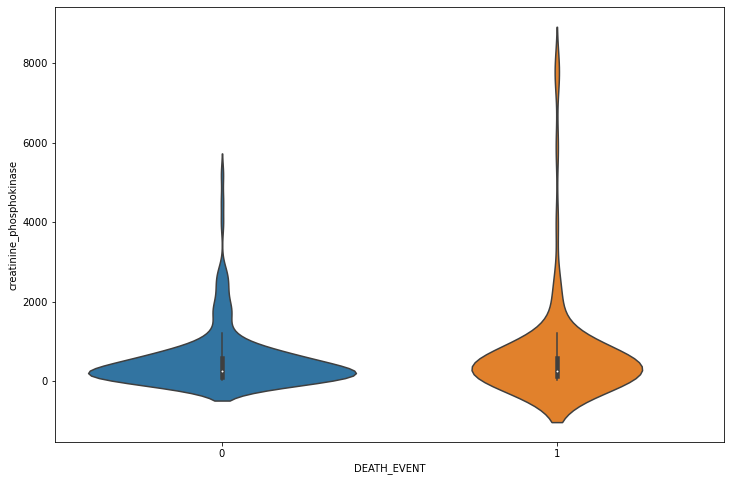

In [14]:
sns.violinplot(y="creatinine_phosphokinase", x="DEATH_EVENT",data=data);

- 2. `ejection_fraction`: "Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. A normal heart’s ejection fraction may be between 50 and 70 percent. A ejection fraction measurement under 40 percent may be evidence of heart failure. You can have a normal ejection fraction measurement and still have heart failure (called HFpEF or heart failure with preserved ejection fraction)". Resumiendo: un EF inferior a 40% puede ser indicativo de fallo cardiaco. Sin embargo, también es posible sufrir un fallo cardiaco con valores EF normales.

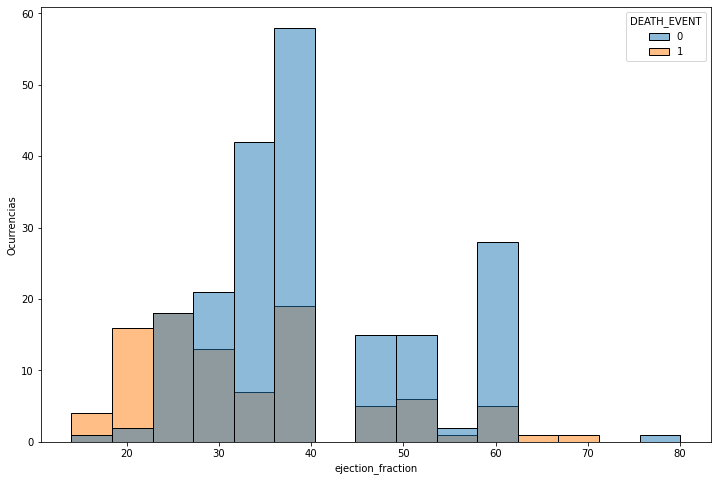

In [15]:
sns.histplot(x = data.ejection_fraction, hue = data.DEATH_EVENT);
plt.ylabel('Ocurrencias');


In [16]:
relative_change(data, 'ejection_fraction')

El valor promedio de  ejection_fraction  para los pacientes que fallencen es de:  33.46875
El valor promedio de  ejection_fraction  para los pacientes que sobreviven es de:  40.26600985221675
Diferencia relativa:  18.43705700226105 %


Esto es algo como lo que esperábamos, valores muy bajos son indicativos de fallo cardiaco. Más pacientes con valores de EF bajos fallecen.

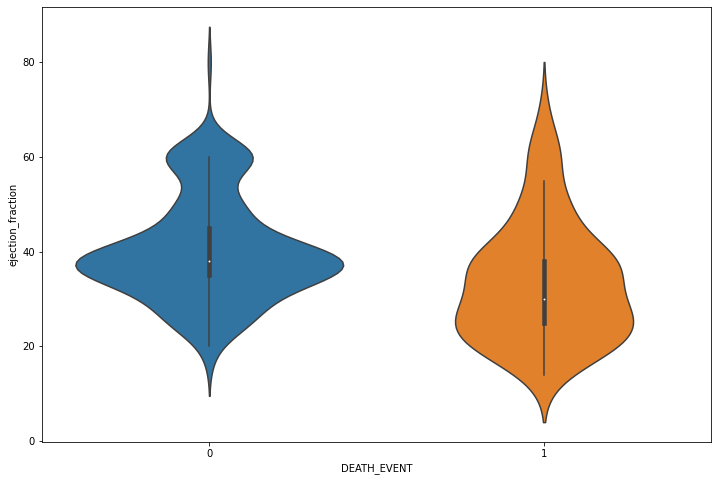

In [17]:
sns.violinplot(y="ejection_fraction", x="DEATH_EVENT",data=data);

- 3. `platelets`: Las plaquetas, también conocidas como trombocitos, juegan un papel importante en la coagulación de la sangre. Normalmente, cuando uno de sus vasos sanguíneos se rompe, comienza a sangrar. Las plaquetas se coagularán para tapar la lesión en el vaso sanguíneo y detener el sangrado. 

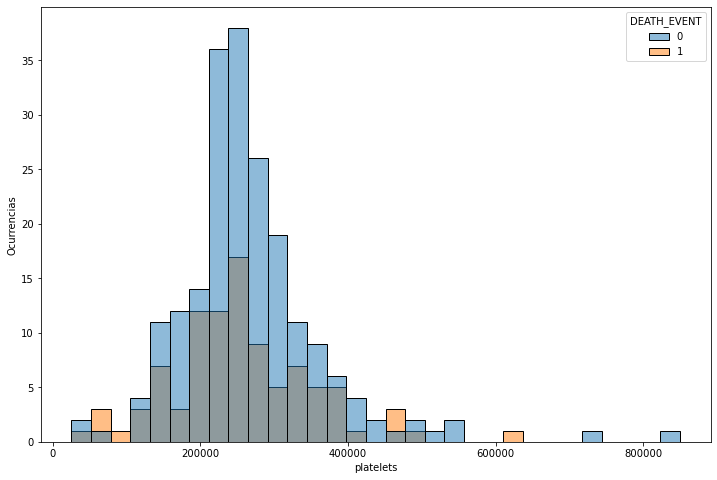

In [18]:
sns.histplot(x = data.platelets, hue = data.DEATH_EVENT);
plt.ylabel('Ocurrencias');

En este caso ambas distribuciones se supoerponen y es díficil sacar conclusiones. Es posible que este feature no ayude.

In [19]:
relative_change(data, 'platelets')

El valor promedio de  platelets  para los pacientes que fallencen es de:  256381.0447916667
El valor promedio de  platelets  para los pacientes que sobreviven es de:  266657.4899014779
Diferencia relativa:  3.929517398116811 %


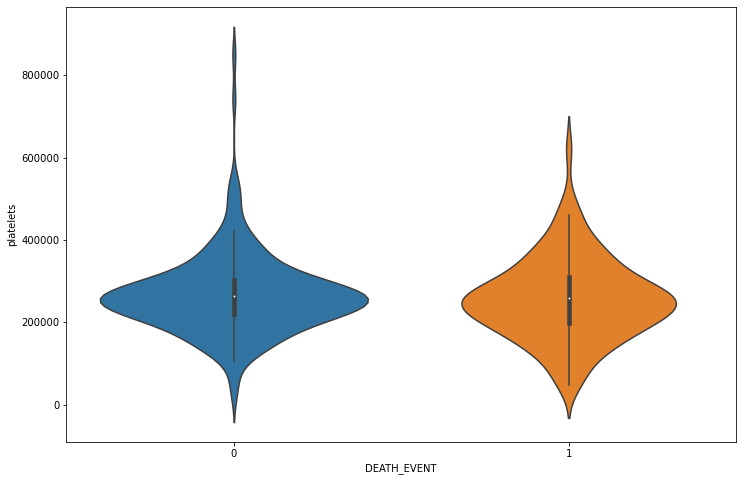

In [20]:
sns.violinplot(y="platelets", x="DEATH_EVENT",data=data);

- 4. `serum sodium`: "Level of serum sodium in the blood (mEq/L). Normal results for this test are 135 to 145 mEq/L. Amongst others, low level of sodium may reflect heart failure ".

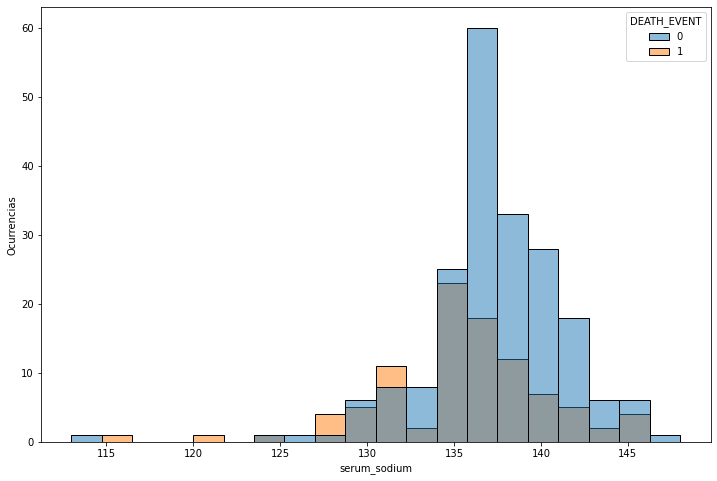

In [21]:
sns.histplot(x = data.serum_sodium, hue = data.DEATH_EVENT);
plt.ylabel('Ocurrencias');

In [22]:
relative_change(data, 'serum_sodium')

El valor promedio de  serum_sodium  para los pacientes que fallencen es de:  135.375
El valor promedio de  serum_sodium  para los pacientes que sobreviven es de:  137.2167487684729
Diferencia relativa:  1.3512872468030634 %


Contratio a lo que esperábamos, no parece haber una gran diferencia entre ambos plots. Ambas distribuciones se parecen similares.

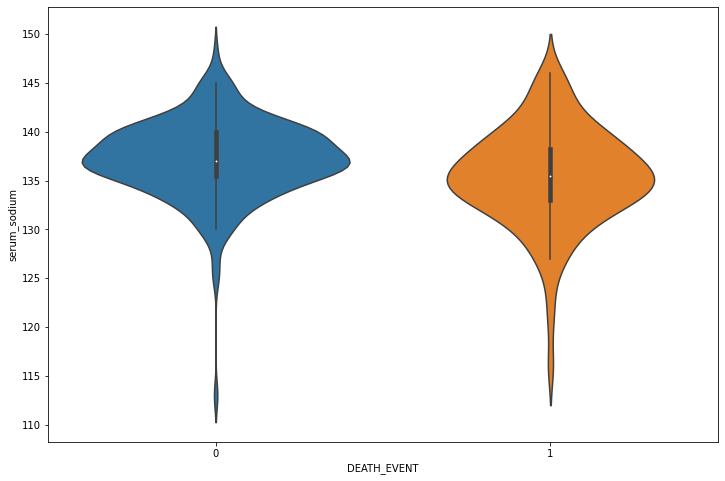

In [23]:
sns.violinplot(y="serum_sodium", x="DEATH_EVENT",data=data);

- 5. `serum_creatinine`: "Creatinine is a waste product that comes from the normal wear and tear on muscles of the body. A creatinene test can be used to detect kidney failure". 

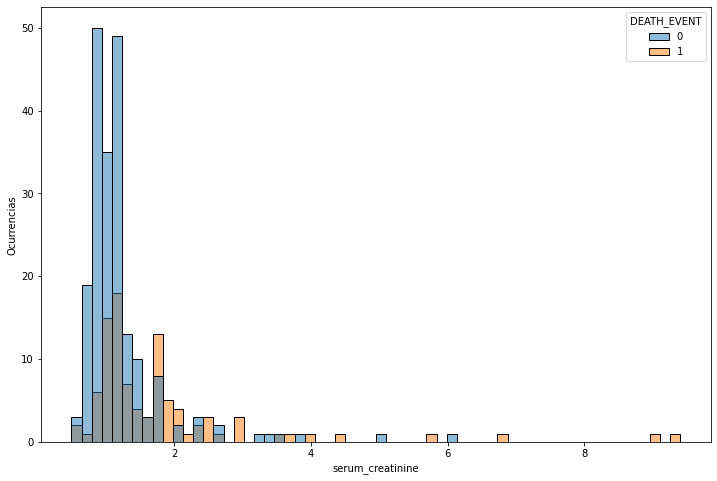

In [24]:
sns.histplot(x = data.serum_creatinine, hue = data.DEATH_EVENT);
plt.ylabel('Ocurrencias');

In [25]:
relative_change(data, 'serum_creatinine')

El valor promedio de  serum_creatinine  para los pacientes que fallencen es de:  1.8358333333333332
El valor promedio de  serum_creatinine  para los pacientes que sobreviven es de:  1.184876847290641
Diferencia relativa:  43.09956580529861 %


Podemos observar claramente que hay que los pacientes con mayor creatinine fallencen (la cola por la derecha es claramente más larga).

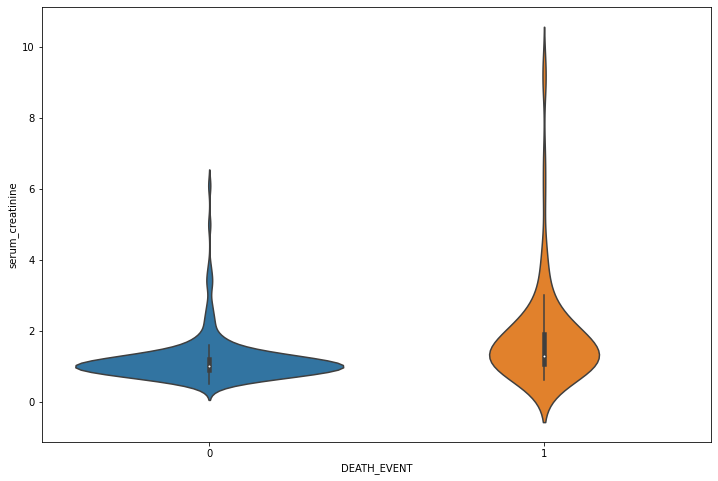

In [26]:
sns.violinplot(y="serum_creatinine", x="DEATH_EVENT",data=data);

- 6. `time`: Tiempo de hospitalización.

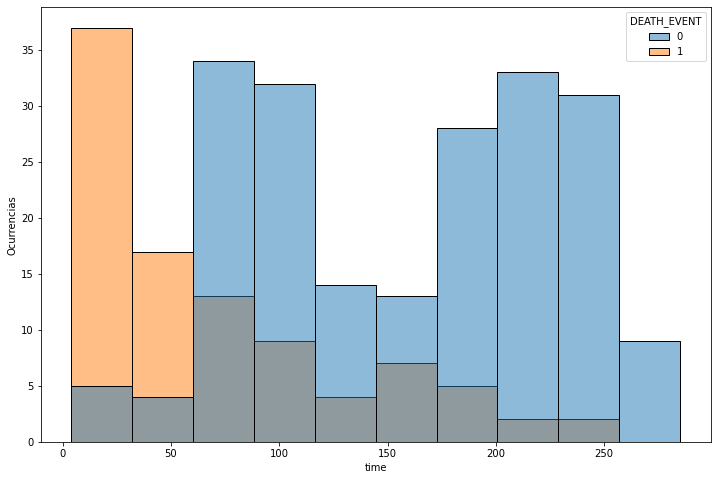

In [27]:
sns.histplot(x = data.time, hue = data.DEATH_EVENT);
plt.ylabel('Ocurrencias');

Hay una clara diferencia entre el tiempo de hospitalización de un paciente y si sobrevive o no. Sin embargo, cuando un paciente llega al hospital con X síntomas, no sabemos el tiempo que estará ingresado. En caso de que empleásemos este feature en el modelo, podríamos obtener buenos resultados en el train y test set (puesto vendrán de del csv y tenemos esos datos) pero, sin embargo, de cara a una aplicación real, **no dispondremos de esta información**. Por tanto, no emplearemos esta columna para entrenar nuestro modelo.  

- 7. Age: Edad de cada paciente

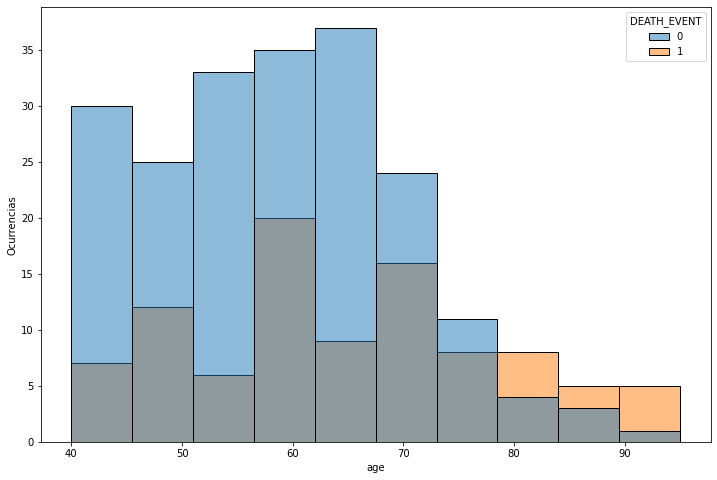

In [28]:
sns.histplot(x = data.age, hue = data.DEATH_EVENT);
plt.ylabel('Ocurrencias');

In [29]:
relative_change(data, 'age')

El valor promedio de  age  para los pacientes que fallencen es de:  65.21528125
El valor promedio de  age  para los pacientes que sobreviven es de:  58.76190640394089
Diferencia relativa:  10.410584347295408 %


Como cabría esperar, los pacientes de mayor edad tienen más posibilidades de morir.

Si observamos la correlación de los datos podemos sacar conclusiones similares:

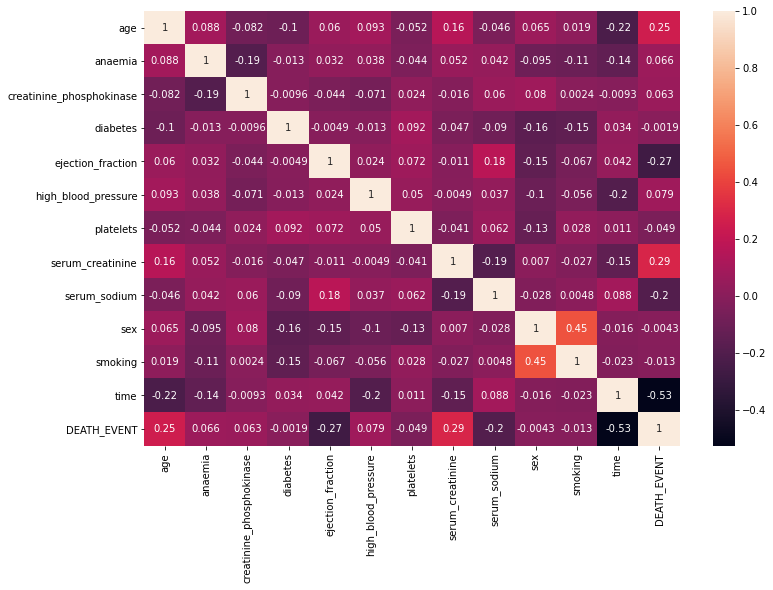

In [30]:
sns.heatmap(data.corr(), annot=True);

El hecho que la correlación sea positiva o negativa es indiferente, lo que buscamos es evidencia de relación. Nos fijamos en los valores absolutos de la correlación con `DEATH_EVENT`:

In [31]:
data.corr().DEATH_EVENT.abs().sort_values(ascending = False)[1:]

time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
Name: DEATH_EVENT, dtype: float64

Cabe destacar que simplemente visualizando las distribuciones habíamos llegado a conclusiones similares. La correlación nos ha servido para verificar que posiblemente, la columna de CPK no sea muy útil.

#### Conclusiones

- 1. `time` es el feature que mejor podría ayudarnos a predecir la supervivencia de los pacientes. Sin embargo, se trata de información que no tendríamos en caso de una aplicación real. Cuando un paciente llega al hospital por primera vez, no sabemos cuánto tiempo va a estar.
- 2. Los features más prometedores son: `serum_creatinine`, `ejection_fraction`, `age` y `serum_sodium`.
- 3. Dado que se trata de un dataset tan pequeño (299 pacientes), lo más sensato sería comenzar a predicir con 2 features e ir introduciendo más features para ver si el modelo mejora.

### Feature importance

Una alternativa que también es útil para seleccionar las features más influyentes es entrenando un algoritmo basado en Decision Trees y obtener: `model.feature_importances_`. Cuando se construye un único árbol, en cada nodo se decide si y cómo hacer el split de forma greedy minimizando una función de coste (en sklearn, el default es Gini). De esta forma, al entrenar un árbol, sklearn calcula el impacto de cada feature para minimizar la función de coste. En el caso de emplear un método tipo ensemble, podemos obtener la importancia promedio de cada feature (ponderada también por el número de muestras en cada nodo):

In [32]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,y)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)

In [34]:
print(feat_importances.sort_values(ascending = False))

time                        0.347662
serum_creatinine            0.137536
ejection_fraction           0.116543
creatinine_phosphokinase    0.092453
platelets                   0.087596
age                         0.086902
serum_sodium                0.070928
anaemia                     0.014731
sex                         0.013223
high_blood_pressure         0.011985
diabetes                    0.011586
smoking                     0.008854
dtype: float64


Las **conclusiones a las que llegamos son similares**. Las columnas de mñas importancia son `serum_creatinine`, `ejection_fraction` y `age`.

### Pairplots

Antes de emplear un modelo u otro también es interesante ver plots de dos varibles para ambos casos. Esto nos puede dar una idea de cómo deben ser los boundaries en el caso de emplear únicamente dos features.

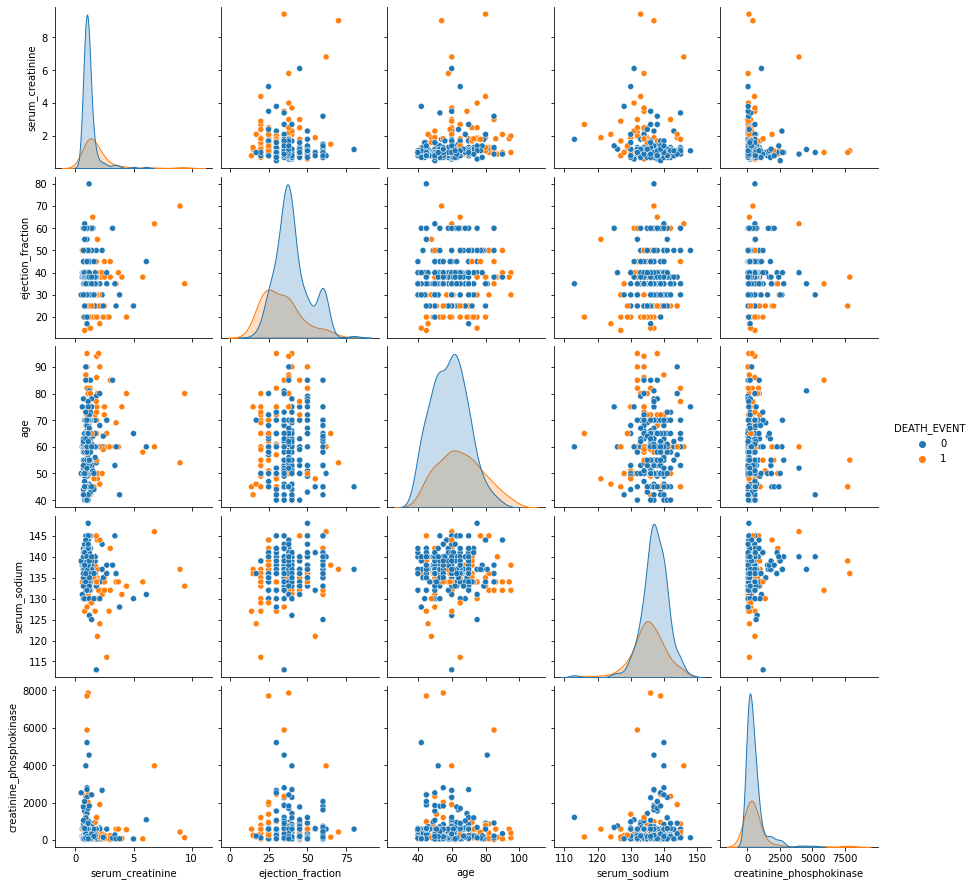

In [35]:
sns.pairplot(data[['serum_creatinine', 'ejection_fraction','age','serum_sodium','creatinine_phosphokinase', 'DEATH_EVENT']], hue="DEATH_EVENT")

### Modelado

Lo primero que haremos será dividir los datos en train/test set.

In [36]:
from sklearn.model_selection import train_test_split
# Cogemos un random_state por repetitividad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [37]:
print(y_train.mean())
print(y_train.shape)

0.3080357142857143
(224,)


In [38]:
print(y_test.mean())
print(y_test.shape)

0.36
(75,)


Lo primero que debemos hacer es elegir una métrica para poder comparar modelos. Ejemplos de métricas podrían ser:

- Accuracy: Porcentaje de errores $\frac{TP + TN}{TP + TN + FP + FN}$
- Precision: De todos los pacientes que el modelo clasifica como positivos (fallece), ¿cuáles son correctos? $\frac{TP}{TP+FP}$.
- Recall (exhaustividad): $\frac{TP}{TP+FN}$. 
- F1-Score: Precision y recall están relacionados. Un modelo que solo predijese poisito cuando estuviese muy seguro tendría una precision muy alta y un recall muy malo. De la misma forma un modelo que predijese siempre 1 (no hay falsos negativos) tendría un recall de 1. La métrica F1 hace una media armónica de precision y recall ($\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$).
- ROC - AUC: Área de la curva ROC (TPR vs FPR). 

Habría que considerar qué queremos evitar (falsos positivos o falsos negativos) y escoger la métrica más apropiada para nuestro objetivo. Dado que el dataset no está completamente balanceado y queremos penalizar más los FP y FN, vamos a escoger F1-Score.

Una vez decidida la métrica que vamos a emplear, podremos jugar/optimizar con:

- Features emplear.
- Hiperparámetros del modelo.
    - Logistic Regression: regularización (l2, l1, none), C (inverso de la regularización, los valores más pequeños implican más regularización) etc.
    - SVC: C (igual que antes, regularización), kernel a emplear ('rbf)...

#### Logistic Regression

In [39]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
258,45.0,1,66,1,25,0,233000.00,0.80,135,1,0,230
37,82.0,1,855,1,50,1,321000.00,1.00,145,0,0,30
97,70.0,1,59,0,60,0,255000.00,1.10,136,0,0,85
191,64.0,1,62,0,60,0,309000.00,1.50,135,0,0,174
135,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Como queremos estandarizar los datos, lo añadimos al pipeline. De esta forma
# escribimos menos código y evitamos tener data leakage (que tendríamos, por ejemplo,
# si notmalizamos considerando todas las muestras).

pipeline = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])

# Aunque podemos jugar con más valores, comenzamos únicamente con estos
parameters = {'clf__C':[1,2,5,10]}
# cv por defecto es 5-fold
clf = GridSearchCV(pipeline, parameters, scoring='f1')
# Entrenamos el modelo. En el primer caso, con las dos features de más importancia
clf.fit(X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [1, 2, 5, 10]}, scoring='f1')

In [41]:
def evaluate_model(model, X, y):
    """
    Evaluamos el modelo
    """
    y_pred = model.predict(X)
    cm = confusion_matrix(y,y_pred)
    sns.heatmap(cm, annot = True)
    print('Accuracy: ',accuracy_score(y, y_pred))
    print('F1-Score: ',f1_score(y, y_pred))

Respuesta del modelo en training: 
Accuracy:  0.7455357142857143
F1-Score:  0.44660194174757284
------------------------------
Respuesta del modelo en test: 
Accuracy:  0.7466666666666667
F1-Score:  0.5128205128205128


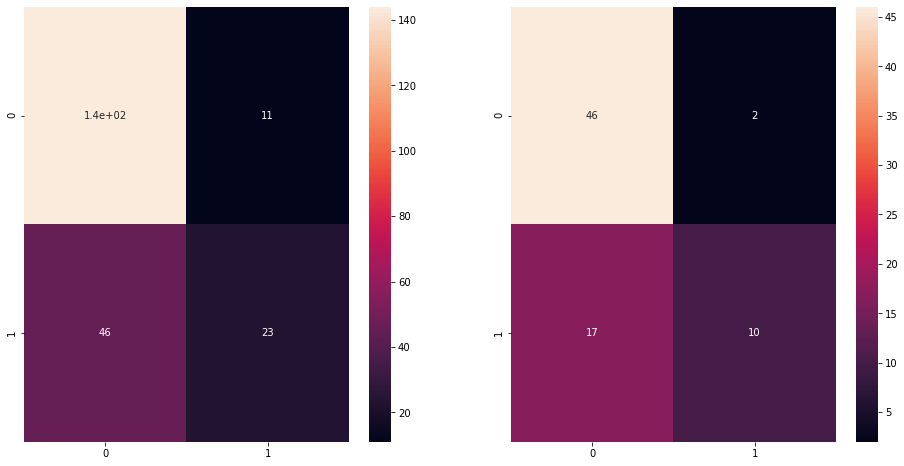

In [42]:
# Evaluación del modelo
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
print('Respuesta del modelo en training: ')
evaluate_model(clf, X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)

print('------------------------------')

plt.subplot(1,2,2)
print('Respuesta del modelo en test: ')
evaluate_model(clf, X_test.loc[:,['serum_creatinine', 'ejection_fraction']], y_test)

Como vemos, el f1 score del modelo no es ni muy bueno en primer lugar. Podemos jugar añadiendo más features para ver cómo se comporta. En cualquier caso, seguramente el modelo no sea linealmente separable con 2-4 features, por lo que a continuación probaremos otros métodos. De hecho, cabe destacar que el modelo funciona mejor en el test set que en el train set.

#### SVC

En este caso, emplearemos un método basado en Support Vector Macines con un kernel RBF para poder conseguir un decision boundary más complejo. El funcionamiento de SVC es el siguiente:
- Usaremos los $m$ samples del training set como landmarks.
- Para cada sample (dado por la muestra $(i)$), obtendremos tantos features como landmarks de la siguiente forma:
 ${x_j}^{(i)} = exp(-\frac{{|| {x}^{(i)} - landmark_j||}^2}{2 \gamma ^2})$.
 - De esta forma, cuando una muestra esté cerca de un landmark obtendremos un valor cercano a 1, y 0 cuando esté muy lejos (y $\gamma$ define lo que consideramos cerca o lejos).
- Gracias al kernel trick, podremos conseguir regiones de decisión más complicadas (no lineales).

Los hiperparámetros más influyentes son $C$ (inversa de la regularización) y $\gamma$.

In [43]:
from sklearn.svm import SVC
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', SVC())])
# Aunque podemos jugar con más valores, comenzamos únicamente con estos (por defecto el kernel es rbf')
parameters = {'clf__C':[0.5,1,2,5,10], 'clf__gamma':[0.1,0.5,1,2,3,4]}
# cv por defecto es 5-fold
clf = GridSearchCV(pipeline, parameters, scoring='f1')
# Entrenamos el modelo. En el primer caso, con las dos features de más importancia
clf.fit(X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.5, 1, 2, 5, 10],
                         'clf__gamma': [0.1, 0.5, 1, 2, 3, 4]},
             scoring='f1')

In [44]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC(C=1, gamma=3))])

Respuesta del modelo en training: 
Accuracy:  0.8125
F1-Score:  0.671875
------------------------------
Respuesta del modelo en test: 
Accuracy:  0.76
F1-Score:  0.6538461538461539


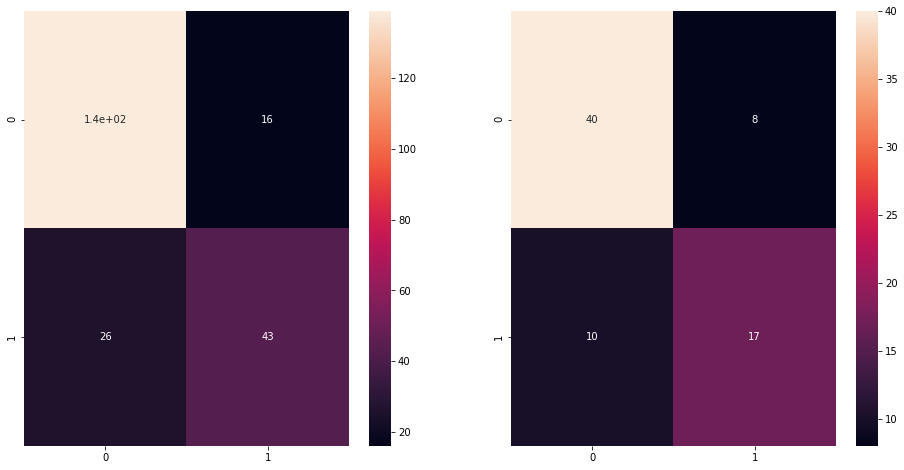

In [45]:
# Evaluación del modelo
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
print('Respuesta del modelo en training: ')
evaluate_model(clf, X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)

print('------------------------------')

plt.subplot(1,2,2)
print('Respuesta del modelo en test: ')
evaluate_model(clf, X_test.loc[:,['serum_creatinine', 'ejection_fraction']], y_test)

Tanto la métrica f1 como el porcentaje de muestras correctamente clasificadas (accuracy) son bastante mejores que para el modelo lineal de Logistic Regression. Ahora vamos a ver la región de decisión de SVC:

In [46]:
def plt_regions(model, X, y):
    
    """
    Plottearemos las regiones de decisión. 
    Inputs:
        - model: modelo ya entrenado.
        - X: DataFrame con los features (2 features).
        - y: Clase de cada sample
    
    """
    # Convertimos los Dataframes a arrays nmpy
    
    X = X.values
    y = y.values
    
    # Límites de grid
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    
    # Grids
    x1grid = np.arange(min1, max1, 0.3)
    x2grid = np.arange(min2, max2, 0.3)
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    # Aplanamos los grids como vectores y los combinamos
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    
    # Hacemos las predicciones para todo el grid
    y_grid = model.predict(grid)
    
    # Lo ponemos en forma de matriz:
    zz = y_grid.reshape(xx.shape)
    
    # Ploteamos el contorno
    plt.contourf(xx, yy, zz, cmap='Paired')
    
    for class_value in range(2):
        # Obtenemos los índices para los valores de cada clase
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label = class_value)
        plt.legend()
   
    plt.show()

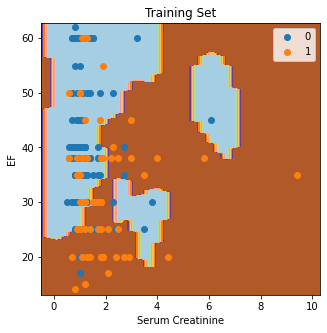

In [47]:
plt.figure(figsize=[5,5])
plt.ylabel('EF')
plt.xlabel('Serum Creatinine')
plt.title('Training Set');
plt_regions(clf, X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)


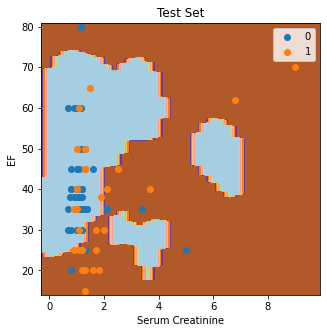

In [48]:
plt.figure(figsize=[5,5])
plt.ylabel('EF')
plt.xlabel('Serum Creatinine')
plt.title('Test Set');
plt_regions(clf, X_test.loc[:,['serum_creatinine', 'ejection_fraction']], y_test)


En el primer plot (train set), vemos que hay tres áreas en las que se decide 0. Particularmente, una de ellas se decide en torno a un único punto. En otra de ellas se decide 0 en función de  4 ó 5 puntos azules. Aunque en el test set no hay puntos en estas regiones, al menos podemos ver que para el segundo caso, hay 2 samples cerca de esta región.

Con una dataset tan pequeño es realmente complicado ajustar los hiperparámetros y que el modelo generalice bien.

A continuación, podríamos automatizar la selección de columnas, para ver si añadiendo alguna otra columna, el comportamiento mejora. Sin embargo, con una prueba rápida añadiendo el siguiente feature más importante (`age`), podemos ver que, de hecho, la respuesta de SVC empeora:

Respuesta del modelo en test: 
Accuracy:  0.6933333333333334
F1-Score:  0.4888888888888889


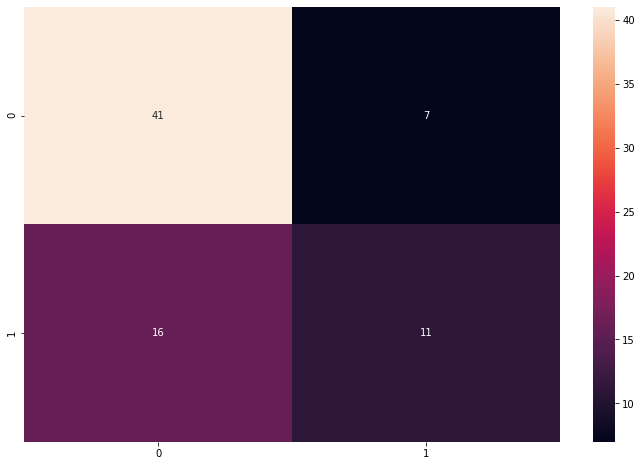

In [49]:
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', SVC())])
# Aunque podemos jugar con más valores, comenzamos únicamente con estos
parameters = {'clf__C':[0.5,1,2,5,10], 'clf__gamma':[0.1,0.5,1,2,3,4]}
# cv por defecto es 5-fold
clf = GridSearchCV(pipeline, parameters, scoring='f1')
# Entrenamos el modelo. En el primer caso, con las dos features de más importancia
clf.fit(X_train.loc[:,['serum_creatinine', 'ejection_fraction','age']], y_train)

print('Respuesta del modelo en test: ')
evaluate_model(clf, X_test.loc[:,['serum_creatinine', 'ejection_fraction','age']], y_test)

Esto mismo ocurre si añadimos el feature `serum_sodium`.

La única columna que mejora notablemente el comportamiento del modelo es `time`. Columna que, dado que no tendremos en una aplicación real, no debemos emplear:

Respuesta del modelo en test: 
Accuracy:  0.8666666666666667
F1-Score:  0.8076923076923077


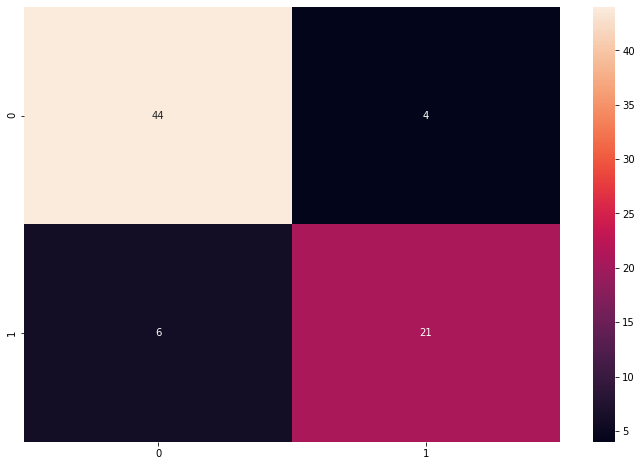

In [50]:
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', SVC())])
# Aunque podemos jugar con más valores, comenzamos únicamente con estos
parameters = {'clf__C':[0.5,1,2,5,10], 'clf__gamma':[0.1,0.5,1,2,3,4]}

clf = GridSearchCV(pipeline, parameters, scoring='f1')
# Entrenamos el modelo. En el primer caso, con las dos features de más importancia
clf.fit(X_train.loc[:,['serum_creatinine', 'ejection_fraction','time']], y_train)

print('Respuesta del modelo en test: ')
evaluate_model(clf, X_test.loc[:,['serum_creatinine', 'ejection_fraction','time']], y_test)

#### Random Forest Classifier

El último de los modelos que vamos a comparar es un algoritmo basado en árboles de decisión. Estos modelos promedian una gran cantidad de clasificadores muy ruidosos para mejorar la generalización del modelo. Una ventaja de estos métodos es que, normalmente, funcionan bien con los parámetros por defecto:

Respuesta del modelo en training: 
Accuracy:  0.9107142857142857
F1-Score:  0.8591549295774648
------------------------------
Respuesta del modelo en test: 
Accuracy:  0.7333333333333333
F1-Score:  0.6153846153846153


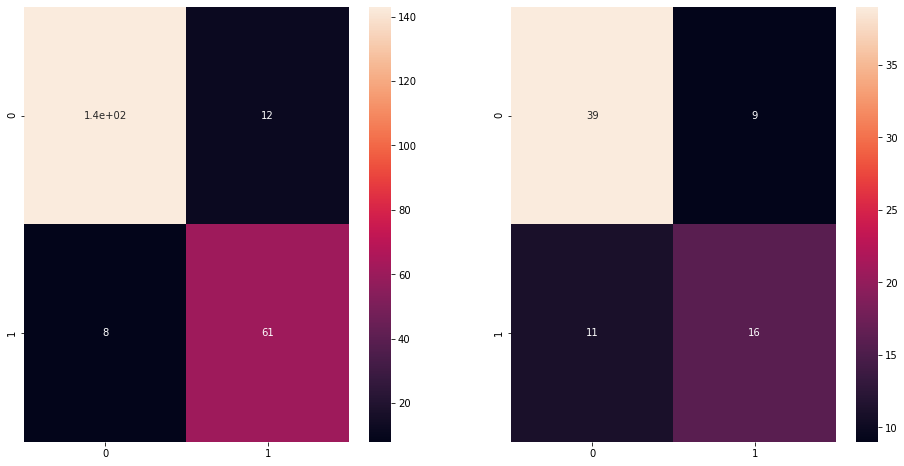

In [51]:
clf = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])
clf.fit(X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)

# Evaluación del modelo
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
print('Respuesta del modelo en training: ')
evaluate_model(clf, X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)

print('------------------------------')

plt.subplot(1,2,2)
print('Respuesta del modelo en test: ')
evaluate_model(clf, X_test.loc[:,['serum_creatinine', 'ejection_fraction']], y_test)

En este caso, no es lo que ocurre. Como podemos ver, hay una diferencia muy grande entre el comportamiento del bosque en el set de entrenamiento y en el de test. De hecho, observarndo la región de decisión vemos que claramente el método sobreajusta al set de entrenamiento.

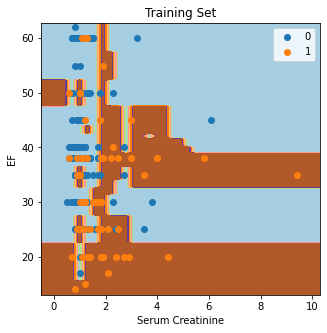

In [52]:
plt.figure(figsize=[5,5])
plt.ylabel('EF')
plt.xlabel('Serum Creatinine')
plt.title('Training Set');
plt_regions(clf, X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)


Con el objetivo de minimizar la varianza del método, podemos:
- Emplear más árboles (se promedia más y en principio deberá generalizar mejor).
- Limitar el crecimiento de cada árbol.
- Aumenar el número de samples necesarios para realizar un split (por defecto es dos).

In [53]:
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])
# Aunque podemos jugar con más valores, comenzamos únicamente con estos
parameters = {'clf__n_estimators':[300, 400, 500], 'clf__max_depth': [5,6], 'clf__min_samples_split':[5,6]}

clf = GridSearchCV(pipeline, parameters, scoring='f1')
# Entrenamos el modelo. En el primer caso, con las dos features de más importancia
clf.fit(X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)


clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=6, min_samples_split=6,
                                        n_estimators=400))])

Respuesta del modelo en training: 
Accuracy:  0.8616071428571429
F1-Score:  0.7559055118110236
------------------------------
Respuesta del modelo en test: 
Accuracy:  0.76
F1-Score:  0.5909090909090909


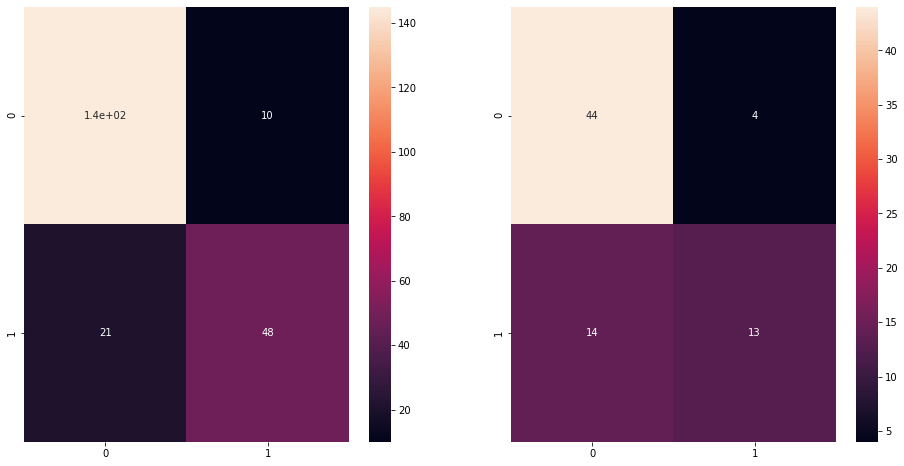

In [54]:
# Evaluación del modelo
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
print('Respuesta del modelo en training: ')
evaluate_model(clf, X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)

print('------------------------------')

plt.subplot(1,2,2)
print('Respuesta del modelo en test: ')
evaluate_model(clf, X_test.loc[:,['serum_creatinine', 'ejection_fraction']], y_test)

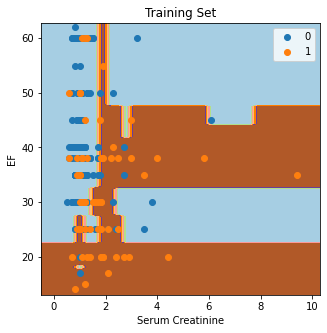

In [55]:
plt.figure(figsize=[5,5])
plt.ylabel('EF')
plt.xlabel('Serum Creatinine')
plt.title('Training Set');
plt_regions(clf, X_train.loc[:,['serum_creatinine', 'ejection_fraction']], y_train)

## Conclusiones

- En primer lugar, es importante destacar que un dataset con 299 muestras es muy pequeño para sacar este tipo de conclusiones. Sería interesante (y no demasiado complicado), aumentar el dataset para obtener una muestra más representativa.
- La métrica que emplemos debe ajustarse a nuestro objetivo. Debemos decidir qué nos importa más (FP vs FN).
- Con un dataset tan pequeño, personalmente no me decantaría por un método complejo (ni RF ni ANN). Emplearía SVC controlando la regularización.